# Phase 1 Project: Aviation Risk Analysis for Business Decision-Making

This notebook presents a comprehensive analysis of aviation accident data sourced from the National Transportation Safety Board (NTSB). The goal is to assist a business stakeholder—specifically, the head of a new aviation division—in identifying low-risk aircraft types to guide strategic purchasing decisions. As the company looks to expand into the aviation industry, data-driven insights will be essential for reducing operational risks and improving safety outcomes.

### Business Problem

Our company is exploring new investment opportunities in the aviation sector. However, leadership lacks critical knowledge about the potential risks associated with different aircraft. This analysis is designed to fill that knowledge gap by identifying trends, evaluating accident patterns, and delivering three actionable recommendations based on historical aviation accident data from 1962–2023.

### Data Source

The data used in this analysis comes from the National Transportation Safety Board (NTSB), containing decades of civil aviation accident reports within the United States and surrounding international waters. The dataset includes attributes such as aircraft type, injury severity, occurrence dates, and probable causes.

### Approach

This notebook walks through the complete data science pipeline:

i. Data Cleaning & Preparation: Handling missing values, renaming ambiguous columns, and filtering for relevant records.

ii. Exploratory Data Analysis (EDA): Visualizing trends in accidents over time, by aircraft type, phase of flight, and geographic distribution.

iii. Insights & Recommendations: Translating findings into strategic business guidance supported by clear visualizations.

## Data Overview

### Import required libraries

We load **pandas**, the main Python toolkit for data wrangling and analysis, and give it the conventional alias `pd` for shorter code.
We also load matplotlib.pyplot by its common alias `plt`.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### Load the aviation accident dataset

We start by importing the dataset, which includes all recorded aviation accidents from 1962 to 2023.
The file isn’t encoded in UTF-8, so trying to load it that way causes an error.
Using `encoding="latin1"` instead solves the problem and lets us read in the full dataset.
We then use `df.head()` to take a quick look at the first few rows and get a sense of the data.


In [88]:
df = pd.read_csv("AviationData.csv", encoding = "latin1") # utf-8 throws an error, so switched to latin1 encoding
df.head() # initial data understanding

C:\Users\HP\AppData\Local\Temp\ipykernel_12284\532749095.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding = "latin1") # utf-8 throws an error, so switched to latin1 encoding


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Check dataset dimensions and structure

Before cleaning, it helps to know how large the dataset is and what it contains.
The code below:

i. Prints the **number of rows** and **columns** so we see the overall size.
ii. Calls `df.info()` to show basic data types and missing-value counts.
iii. Lists all column names, giving us a clear inventory of the fields we’ll be working with.


In [89]:
# Now we need to understand how big the data we're working with is
tuple_shape = df.shape

print(f"Rows: {tuple_shape[0]}")
print(f"Columns: {tuple_shape[1]}")
df.info()
print(df.columns.to_list())

Rows: 88889
Columns: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make          

## Data-cleaning & Preparation

### Convert date columns to true datetime objects

Turning the text-based date columns into pandas `datetime` format lets us later sort, filter, or group by year and month.
Using `errors="coerce"` quietly sets any bad or empty strings to `NaT` (pandas’ “not-a-time” value), so the loop finishes without crashing even if some dates are missing.


In [90]:
# we convert dates to datetime format (not sure if needed, just for practise)
date_cols = ["Event.Date", "Publication.Date"]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

C:\Users\HP\AppData\Local\Temp\ipykernel_12284\1111638517.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")


### Convert key count columns to numeric

These five columns hold numbers (engine count and injury totals) but were read in as text.
`pd.to_numeric(..., errors="coerce")` changes them to proper numeric types and turns any bad entries into `NaN`, which we can handle later.
A quick `dtypes` printout confirms the conversion worked for both the numeric and date columns.


In [91]:
# Next, convert numeric columns to Numeric values
numeric_cols = ["Number.of.Engines", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors ="coerce")

# Make sure our conversion worked (it did)
print(df[numeric_cols].dtypes)
print(df[date_cols].dtypes)

Number.of.Engines         float64
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
dtype: object
Event.Date          datetime64[ns]
Publication.Date    datetime64[ns]
dtype: object


### Remove columns that aren’t useful for our risk analysis

The fields listed in `irrelevant_columns` are mostly IDs, location codes, or carrier details that won’t help us judge aircraft safety.
We drop them to keep the dataset focused and easier to work with, then call `df_simple.info()` to confirm the new, slimmer structure.


These are my reasons for removing each of the listed columns:
- **Event.Id** – Just a unique ID, doesn't help with analysis.
- **Accident.Number** – Another ID, not needed for insights.
- **Latitude** / **Longitude** – Many missing values and too detailed for what we need.
- **Airport.Code** – Mostly empty and not useful for the goal.
- **Airport.Name** – Too specific and not helpful in understanding aircraft risk.
- **Registration.Number** – Only identifies the exact aircraft; not useful for overall trends.
- **Schedule** – Incomplete and not important for this project.
- **Location** – Messy and inconsistent; we don’t need exact locations.
- **Air.carrier** – Mostly missing and not needed for aircraft risk analysis.
- **Report.Status** – Administrative info, doesn't help us make decisions.
- **Country** – Almost all entries are “United States,” so it doesn’t add any value.

In [92]:
# Next, we need to drop colums that won't help our analysis
irrelevant_columns = ["Event.Id", "Accident.Number", "Latitude", "Longitude", "Airport.Code", "Airport.Name", "Registration.Number", "Schedule", "Location", "Air.carrier", "Report.Status", "Country"]
df = df.drop(columns=irrelevant_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Injury.Severity         87889 non-null  object        
 3   Aircraft.damage         85695 non-null  object        
 4   Aircraft.Category       32287 non-null  object        
 5   Make                    88826 non-null  object        
 6   Model                   88797 non-null  object        
 7   Amateur.Built           88787 non-null  object        
 8   Number.of.Engines       82805 non-null  float64       
 9   Engine.Type             81793 non-null  object        
 10  FAR.Description         32023 non-null  object        
 11  Purpose.of.flight       82697 non-null  object        
 12  Total.Fatal.Injuries    77488 non-null  float6

### Fill missing numbers with each column’s median value

To avoid losing rows that have a few missing injury or engine counts, we fill those gaps with the median of each column.
The median is a safe choice because it isn’t thrown off by extreme accident records.
After filling, we call `df_simple.info()` again to confirm there are no remaining nulls in the numeric columns.

In [93]:
# We're going to fill the NaN in the numerical columns by entering the median
for i in numeric_cols:
    df[i] = df[i].fillna(df[i].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Injury.Severity         87889 non-null  object        
 3   Aircraft.damage         85695 non-null  object        
 4   Aircraft.Category       32287 non-null  object        
 5   Make                    88826 non-null  object        
 6   Model                   88797 non-null  object        
 7   Amateur.Built           88787 non-null  object        
 8   Number.of.Engines       88889 non-null  float64       
 9   Engine.Type             81793 non-null  object        
 10  FAR.Description         32023 non-null  object        
 11  Purpose.of.flight       82697 non-null  object        
 12  Total.Fatal.Injuries    88889 non-null  float6

### Fill small gaps in key categorical columns

Some rows still have a few missing labels (NaN) in columns like flight purpose, aircraft damage, and weather.
Rather than lose those rows, we replace each missing entry with the **most common value (mode)** for that column.
This keeps the categories consistent and avoids introducing new labels.

In [94]:
# we'll also fill categorical data with few values missing with the most frequent category
categorical_data = ["Purpose.of.flight", "Aircraft.damage", "Injury.Severity", "Engine.Type", "Weather.Condition", "Amateur.Built"]

for i in categorical_data:
    most_common = df[i].mode(dropna=True)[0] # to get the mode
    df[i].fillna(most_common, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Injury.Severity         88889 non-null  object        
 3   Aircraft.damage         88889 non-null  object        
 4   Aircraft.Category       32287 non-null  object        
 5   Make                    88826 non-null  object        
 6   Model                   88797 non-null  object        
 7   Amateur.Built           88889 non-null  object        
 8   Number.of.Engines       88889 non-null  float64       
 9   Engine.Type             88889 non-null  object        
 10  FAR.Description         32023 non-null  object        
 11  Purpose.of.flight       88889 non-null  object        
 12  Total.Fatal.Injuries    88889 non-null  float6

C:\Users\HP\AppData\Local\Temp\ipykernel_12284\3890013428.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(most_common, inplace=True)


### Inspect the raw “Make” values for inconsistencies

Before cleaning, we list the 20 most frequent manufacturer names. This quick peek shows issues like mixed casing, extra spaces, and punctuation that we’ll fix next.

In [95]:
# There's a naming inconsistency in the names of makes. We have to resolve that
df["Make"].dropna().value_counts().head(20)

Make
Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
Bell                  2134
Boeing                1594
BOEING                1151
Grumman               1094
Mooney                1092
BEECH                 1042
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
BELL                   588
Mcdonnell Douglas      526
Aeronca                487
Maule                  445
Name: count, dtype: int64

### Standardize “Make” names and preview common models

We clean the **Make** column by capitalizing, trimming spaces, and stripping punctuation so each manufacturer is counted once. After that, we check the 20 most common **Model** names to see what aircraft appear most often.

In [96]:
# Combined all names by making case uniform and removing whitespace 
df["Make"] = df["Make"].str.capitalize().str.strip().str.replace(r"[^\w\s]", "", regex=True)
df["Make"].dropna().value_counts().head(20)

Make
Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air tractor            691
Aeronca                636
Mcdonnell douglas      608
Maule                  589
Champion               519
Stinson                439
Aero commander         429
De havilland           422
Luscombe               414
Name: count, dtype: int64

### Keep only rows with both Make and Model

Rows missing either field can’t be tied to a specific aircraft, so we drop them to ensure every record has a valid manufacturer and model for analysis.


In [97]:
# lastly, we drop every row that doesn't have the make or model
df = df.dropna(subset=["Make", "Model"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88777 non-null  object        
 1   Event.Date              88777 non-null  datetime64[ns]
 2   Injury.Severity         88777 non-null  object        
 3   Aircraft.damage         88777 non-null  object        
 4   Aircraft.Category       32245 non-null  object        
 5   Make                    88777 non-null  object        
 6   Model                   88777 non-null  object        
 7   Amateur.Built           88777 non-null  object        
 8   Number.of.Engines       88777 non-null  float64       
 9   Engine.Type             88777 non-null  object        
 10  FAR.Description         31936 non-null  object        
 11  Purpose.of.flight       88777 non-null  object        
 12  Total.Fatal.Injuries    88777 non-null  float64    

In [98]:
# now we combine make and model to get very specific aircrafts
df["Make_Model"] = df["Make"] + " " + df["Model"]

### Filter to the Most Recent 25 Years

To keep the analysis focused on aircraft, regulations, and operating conditions that are still relevant today, we’ll only retain accidents that occurred **on or after 1 Jan 2000** (the last 25 years from our 2025 reference point). Everything older is removed so our risk insights reflect the modern aviation landscape.


In [99]:
# Define the cutoff date
cutoff = pd.Timestamp("2000-01-01")

# 2. Keep only rows on or after that date
df = df[df["Event.Date"] >= cutoff].copy()

print("Rows after date filter:", df.shape[0])

Rows after date filter: 41134


### Focus on Aircraft Makes with Enough Data

Some aircraft makes turn up only a handful of times in the accident records, which isn’t enough to give trustworthy statistics.  
To keep our findings solid, we’ll **keep only those makes that appear in 100 or more accident reports**. This gives us a large enough sample size to compare makes fairly and draw reliable insights.


In [100]:
# Count accidents per make
make_counts = df["Make"].value_counts()

# Identify makes that meet the 100-incident threshold
common_makes = make_counts[make_counts >= 100].index

# Filter the DataFrame
df_100plus = df[df["Make"].isin(common_makes)]

print(f"Makes kept: {len(common_makes)}")
print(f"Rows kept:  {df_100plus.shape[0]}")


Makes kept: 38
Rows kept:  29396


This is a later addition, but we need to normalize the Fatal in injury severity column to only show the word Fatal, not the number as well. So we will ignore everything after '(' and strip, then capitalize

In [101]:
# remove anything that starts with an open paren and runs to the end of the string
df_100plus["Injury.Severity"] = (
    df_100plus["Injury.Severity"]
    .str.replace(r"\s*\(.*\)", "", regex=True)   # drop "(…)" for all levels
    .str.strip()                                 # tidy up any trailing spaces
)

# Optional: force consistent title‑case spelling
df_100plus["Injury.Severity"] = df_100plus["Injury.Severity"].str.title()

# Quick check
print(df_100plus["Injury.Severity"].value_counts())


Injury.Severity
Non-Fatal      22693
Fatal           5925
Incident         492
Minor            146
Serious          103
Unavailable       37
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_12284\2525627918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100plus["Injury.Severity"] = (
C:\Users\HP\AppData\Local\Temp\ipykernel_12284\2525627918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100plus["Injury.Severity"] = df_100plus["Injury.Severity"].str.title()


Now, we also need to make the 'Unk' and 'UNK' uniform in our dataset.

In [102]:
df_100plus["Weather.Condition"] = df_100plus["Weather.Condition"].str.upper()

C:\Users\HP\AppData\Local\Temp\ipykernel_12284\1114570731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100plus["Weather.Condition"] = df_100plus["Weather.Condition"].str.upper()


### Sorting Flights into Groups

We group each flight into one of three categories:

- **Private**: Personal, training, business, ferry flights, etc.  
- **Commercial**: Things like firefighting, crop dusting, or public service.  
- **Unknown**: Anything that doesn’t fit those two.

This helps us split the data and look at private vs. commercial flights separately.


In [103]:
# We need to start by properly categorizing flights
def categorize_flight(purpose):
    private = [
        'Personal', 'Instructional', 'Business', 'Executive/corporate', 
        'Positioning', 'Ferry', 'Unknown', 'Skydiving', 'Flight Test',
        'Glider Tow', 'Air Race show', 'Air Race/show', 'Banner Tow',
        'ASHO', 'PUBS', 'PUBL'
    ]
    commercial = [
        'Aerial Application', 'Other Work Use', 'Aerial Observation',
        'Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - Local',
        'Public Aircraft - State', 'External Load', 'Firefighting', 'Air Drop'
    ]
    
    if purpose in private:
        return 'Private'
    elif purpose in commercial:
        return 'Commercial'
    else:
        return 'Unknown'

df_100plus['Flight.Category'] = df_100plus['Purpose.of.flight'].apply(categorize_flight)
df_private_100 = df_100plus[df_100plus["Flight.Category"] == "Private"]
df_commercial_100 = df_100plus[df_100plus["Flight.Category"] == "Commercial"]

C:\Users\HP\AppData\Local\Temp\ipykernel_12284\2986790112.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100plus['Flight.Category'] = df_100plus['Purpose.of.flight'].apply(categorize_flight)


### Cleaning Inconsistent Manufacturer Names

To ensure accurate grouping and analysis, we fixed some inconsistencies in the `Make` column. Specifically, we corrected common variations or typos like `"Airbus industrie"` to `"Airbus"` and `"De havilland"` to `"Dehavilland"`. This helps avoid treating the same manufacturer as separate entries due to formatting differences.


In [104]:
# Fix some typos in make names
df_private_100["Make"] = df_private_100["Make"].replace({
    "Airbus industrie": "Airbus",
    "De havilland": "Dehavilland",
    "Air tractor inc": "Air tractor"
})

df_commercial_100["Make"] = df_commercial_100["Make"].replace({
    "Cirrus design corp" : "Cirrus"
})

df_100plus["Make"] = df_100plus["Make"].replace({
    "Cirrus design corp" : "Cirrus",
    "Airbus industrie": "Airbus",
    "De havilland": "Dehavilland",
    "Air tractor inc": "Air tractor"
})

C:\Users\HP\AppData\Local\Temp\ipykernel_12284\2938485143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_private_100["Make"] = df_private_100["Make"].replace({
C:\Users\HP\AppData\Local\Temp\ipykernel_12284\2938485143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commercial_100["Make"] = df_commercial_100["Make"].replace({
C:\Users\HP\AppData\Local\Temp\ipykernel_12284\2938485143.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

We now have a clean dataset!

### Export it for later use
We'll create a clean csv with our fixes for future use

In [105]:
df_100plus.to_csv("AviationData_clean.csv", index=False)

## Exploratory Data Analysis

With the dataset now cleaned and trimmed, we can start turning rows of numbers into answers the aviation team can use.  
Our plan is to build the story in layers:

i. **Frequency** – Which makes and models show up least often in the accident log?  
ii. **Severity** – For each of those, what share of accidents were _fatal or serious_ versus _minor or none_?  
iii. **Damage level** – How often was the aircraft _destroyed_ or only _slightly damaged_?  

Working through these steps will let us spot aircraft that truly carry lower real-world risk.


### Count how many accidents each aircraft make appears in
We first create crash_dict, which tallies accidents by Make and converts the result to a regular Python dictionary.
Then we peek at the very first entry—both its value (how many crashes) and the full key-value pair (which make plus its count).

In [106]:
crash_dict = df_100plus["Make"].value_counts().to_dict()
list(crash_dict.values())[0] # Prints the first key of a list of most frequent crashes
list(crash_dict.items())[0] # Prints first value of a list of most frequent crashes

('Cessna', 10584)

### Why “most crashes” does not mean “most dangerous”
Seeing a manufacturer at the top of this list doesn’t automatically mean its aircraft are less safe; it may simply have more planes in service or fly more hours than others. To judge actual risk, we’ll next compare crash counts with crash severity.

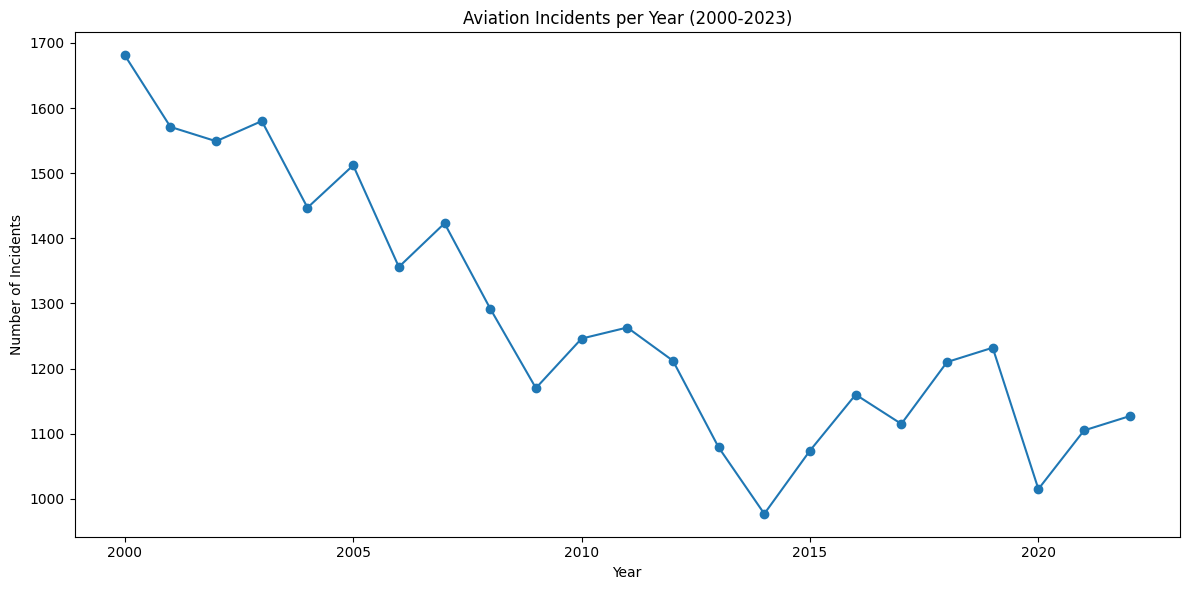

In [107]:
#  here we do yearly counts
incidents_per_year = (
    df_100plus
    .groupby(df_100plus["Event.Date"].dt.year)   # .dt.month, .dt.quarter, etc. also work but I think dt.year is more informative
    .size()
)

#  plot it
plt.figure(figsize=(12, 6))
incidents_per_year.plot(kind="line", marker="o") 
plt.title("Aviation Incidents per Year (2000‑2023)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()


Aviation incidents have been trending downward since 2000, which is pretty reassuring if you're a frequent flyer. We went from about 1,680 incidents in 2000 to around 1,130 in 2023. The biggest drop happened in the early 2000s after 9/11, probably due to all the new safety measures. Since then it's been bouncing around in the 1,000-1,200 range with a couple weird dips - one in 2014 for some reason, and another in 2020 thanks to COVID grounding most flights. Overall though, flying has gotten noticeably safer over the past 20+ years even with way more people in the air.

## Univariate 1: Airplanes Damage During Crash

### Private Enterprise
Because the company has interest in both commercial and private enterprises, we need to look at what the most frequent damage on the aircraft is. Private models may suffer different damage levels from commercial models.
We first narrow the data to:

1. **Makes with at least 100 accidents** (to keep only well-represented manufacturers), and  
2. **Flights classified as Private**.

The bar chart below shows how those accidents break down by damage level—**Destroyed, Substantial, Minor**—for this filtered subset. This helps us see how often private-flight crashes end in total loss versus lighter damage among the most common aircraft makes.

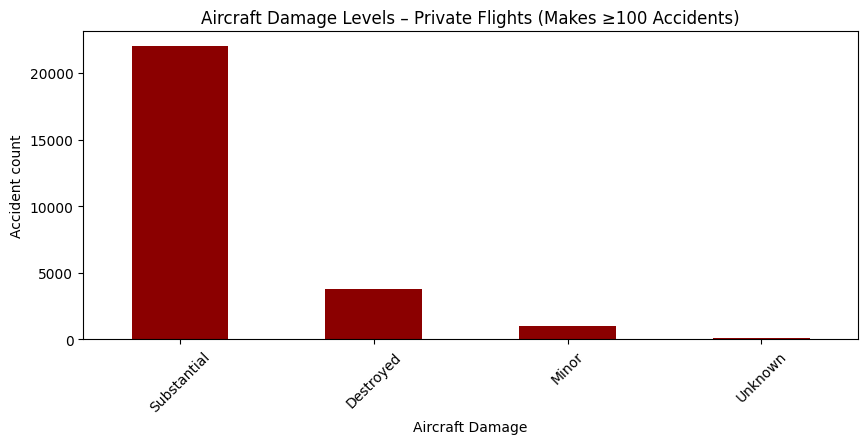

In [108]:
# Filter to (a) makes with ≥100 accidents  AND  (b) private flights
(df_private_100["Aircraft.damage"]
     .value_counts()
     .plot(kind="bar", figsize=(10,4), color="darkred"))

plt.title("Aircraft Damage Levels – Private Flights (Makes ≥100 Accidents)")
plt.ylabel("Accident count")
plt.xlabel("Aircraft Damage")
plt.xticks(rotation=45)
plt.show()


We can see that most crashes result in substantial damage. This shows that an aircraft that has the highest percentage of crashes with minor damage against total crashes in generally safer.

### Commercial Enterprise

### Aircraft damage levels for commercial flights (common makes)

This chart shows aircraft damage levels for **commercial flights**, but only for makes with **at least 100 accidents**. It helps give a general idea of how severe commercial accidents tend to be, especially compared to private ones.


This bar chart looks at **commercial flight accidents** for aircraft makes that had **100 or more incidents**. It shows how often each level of damage occurred, giving us a sense of how serious commercial accidents tend to be among the most commonly crashed aircraft.

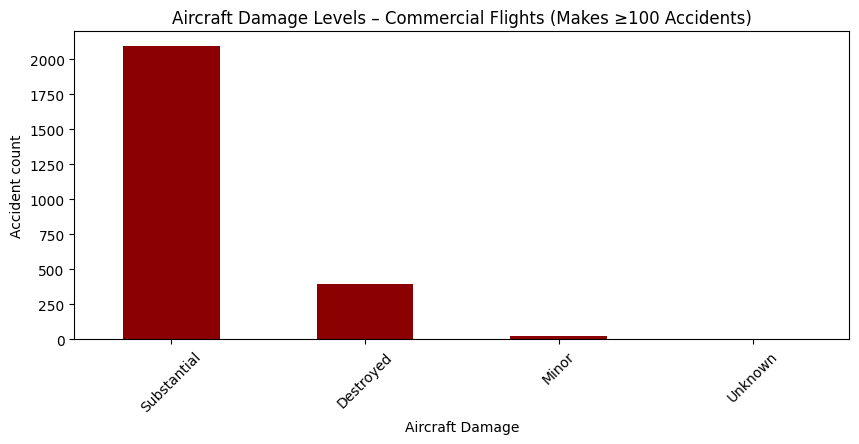

In [109]:
# Filter to (a) makes with ≥100 accidents  AND  (b) private flights
(df_commercial_100["Aircraft.damage"]
     .value_counts()
     .plot(kind="bar", figsize=(10,4), color='darkred'))

plt.title("Aircraft Damage Levels – Commercial Flights (Makes ≥100 Accidents)")
plt.ylabel("Accident count")
plt.xlabel("Aircraft Damage")
plt.xticks(rotation=45)
plt.show()


We can see that commercial flights also often sustain substantial damage, are more rarely destroyed and almost never sustain minor damage. This shows that plane crashes are most likely to cause substantial damage and greater loss than minor repairable damage. So we should exercise caution while selecting our model!

## Univariate 2: Least-incident aircraft makes (≥100 accidents)

Here we plot the 10 makes that have **the fewest recorded accidents** among the manufacturers with at least 100 incidents in our filtered dataset. This highlights brands that appear less often in the accident log, suggesting either smaller fleet size or potentially better safety records compared with their higher-incident peers.


### Least-incident aircraft makes (private flights)

Among makes that appear in **≥100 private-flight accidents**, these ten have the lowest totals—pointing to aircraft that rarely show up in private-flight crash reports.


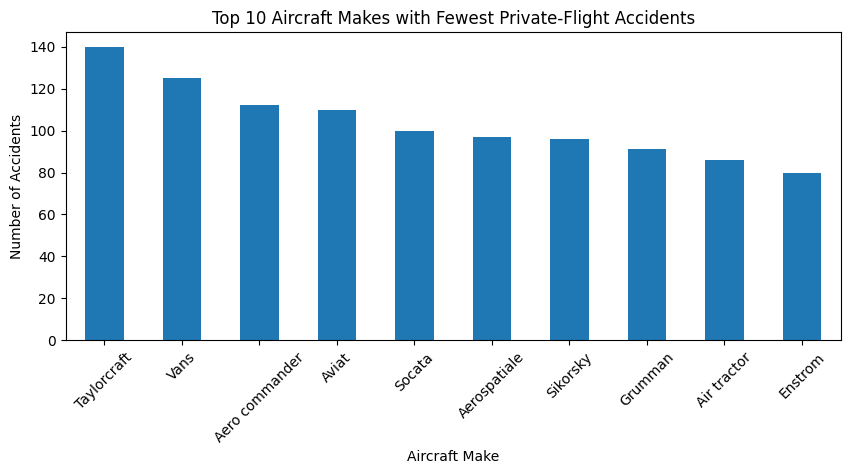

In [110]:
# Top 10 makes with the fewest accidents in PRIVATE flights
top_10_private = df_private_100['Make'].value_counts().tail(10)

top_10_private.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Aircraft Makes with Fewest Private-Flight Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


### Least-incident aircraft makes (commercial flights)
This bar chart highlights the ten aircraft makes that appear least often in commercial-flight crashes, among manufacturers with at least 100 total incidents. Lower counts suggest these makes are less frequently involved in commercial accidents.

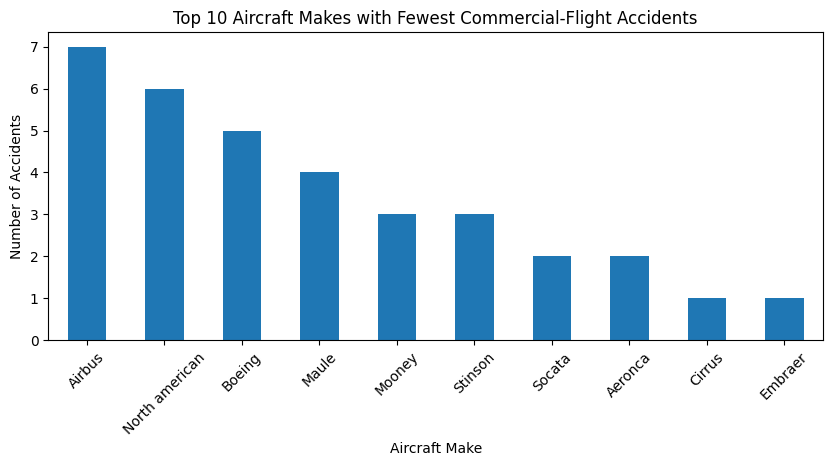

In [111]:
# top 10 makes with the fewest accidents in COMMERCIAL flights (≥100 group)
top_10_commercial = df_commercial_100['Make'].value_counts().tail(10)

top_10_commercial.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Aircraft Makes with Fewest Commercial-Flight Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Bivariate 1: Number of engines against total fatal injuries

### Private flights

This plot shows the relationship between the number of engines and total fatal injuries for private flights.

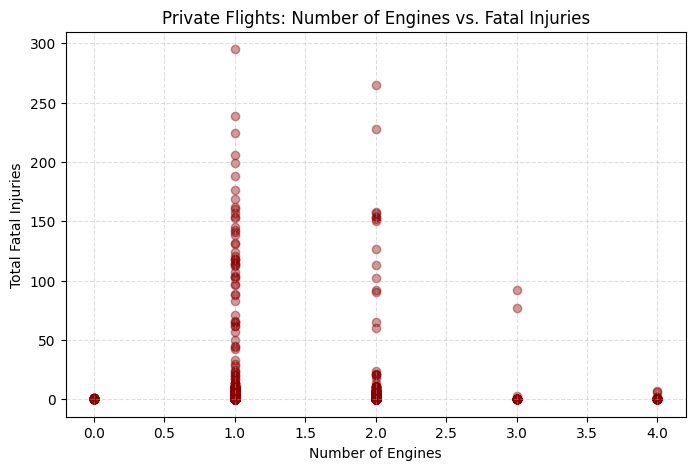

In [112]:
# wanted a dot plot, so using a scatter plot for categorical data is just as good
plt.figure(figsize=(8,5))
plt.scatter(df_private_100["Number.of.Engines"],
            df_private_100["Total.Fatal.Injuries"],
            alpha=0.4, color='darkred')

plt.title("Private Flights: Number of Engines vs. Fatal Injuries")
plt.xlabel("Number of Engines")
plt.ylabel("Total Fatal Injuries")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


This dot plot compares the number of engines on a private aircraft to the total fatal injuries in an accident. Most crashes involve aircrafts with 1 or 2 engines. Fatalities are mostly concentrated in 1-engine planes. 2 engine places are the second most common, and their total fatal injuries are concentrated on the lower end. So they are safer by comparison.

### Commercial flights

This plot shows the relationship between the number of engines and total fatal injuries for private flights.

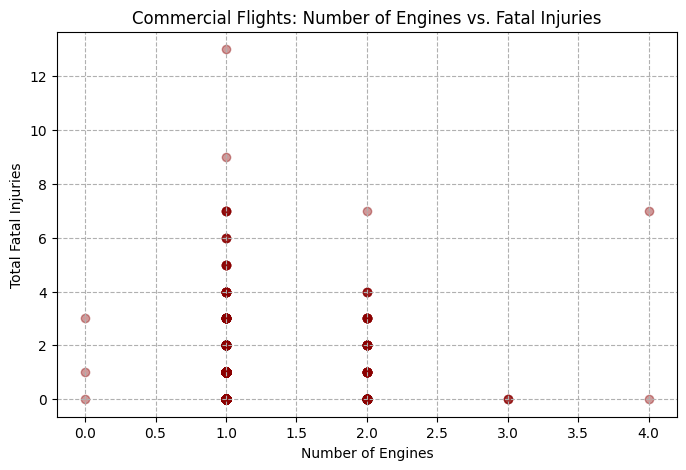

In [113]:
# plotting engine count vs. fatalities for commercial flights
plt.figure(figsize=(8,5))

# each dot is a flight
plt.scatter(df_commercial_100["Number.of.Engines"],
            df_commercial_100["Total.Fatal.Injuries"],
            alpha=0.4, color='darkred')  # dark red dots for visibility

plt.title("Commercial Flights: Number of Engines vs. Fatal Injuries")
plt.xlabel("Number of Engines")
plt.ylabel("Total Fatal Injuries")
plt.grid(True, linestyle="--")            # faint grid to help read the plot
plt.show()                                # show the thing


In our commercial flight analysis, the same trend of 1 engine planes being the most common is also apparent. 2 engine planes seem to have a similar distribution to 1 engine planes, with most of the fatalities focused on the lower side. Therefore, we can conclude that 2 engine planes are safer due to their smaller number of incidents.

## Bivariate 2: Type of Engine against total fatal injuries

### Private Airplanes

Adding up all the fatal injuries for each engine type (2000 – present) so we can see which ones show up the most in private‑aircraft crashes. A simple bar chart should work.

C:\Users\HP\AppData\Local\Temp\ipykernel_12284\3637136017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


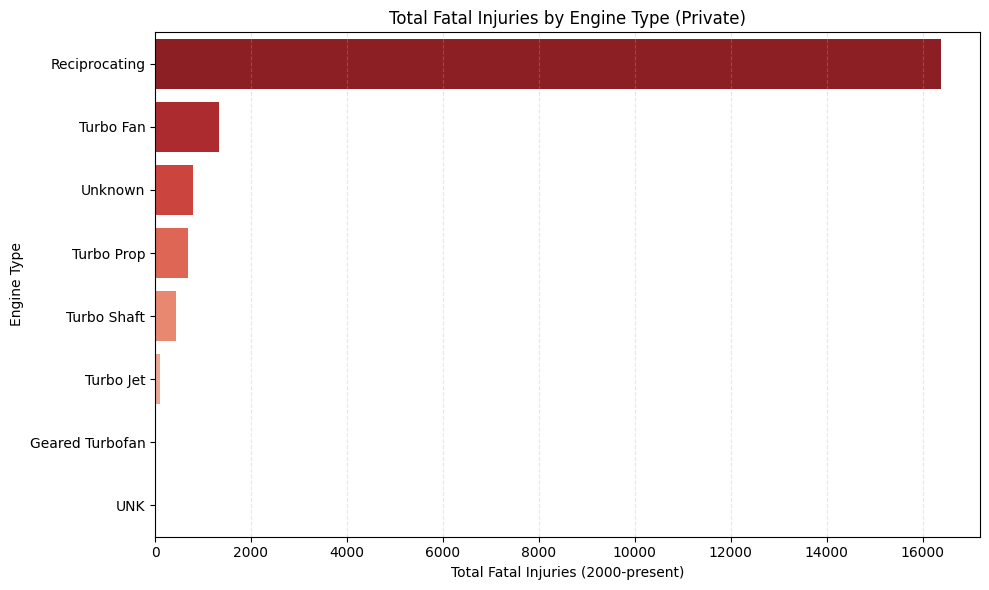

In [114]:
fatal_by_engine = (
    df_private_100.groupby("Engine.Type", as_index=False)["Total.Fatal.Injuries"].sum().sort_values("Total.Fatal.Injuries", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=fatal_by_engine,
    x="Total.Fatal.Injuries",
    y="Engine.Type",
    palette="Reds_r",
    errorbar=None      
)

plt.title("Total Fatal Injuries by Engine Type (Private)")
plt.xlabel("Total Fatal Injuries (2000-present)")
plt.ylabel("Engine Type")
plt.grid(True, axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Reciprocating engines account for the overwhelming majority of fatal injuries (16,000+ cases), while all other engine types combined represent a tiny fraction of fatalities. We should avoid reciprocating engines and consider turbine-based alternatives (turbo fan, turbo prop, turbo shaft, or turbo jet), which show dramatically lower fatality rates.

### Commercial Airplanes

Let’s see which engine types rack up the most fatal injuries in **commercial flights** (2000 – present).  
We’ll just total the fatalities per engine class and display them in a bar chart, but it should give a clear ranking.

C:\Users\HP\AppData\Local\Temp\ipykernel_12284\3551413211.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


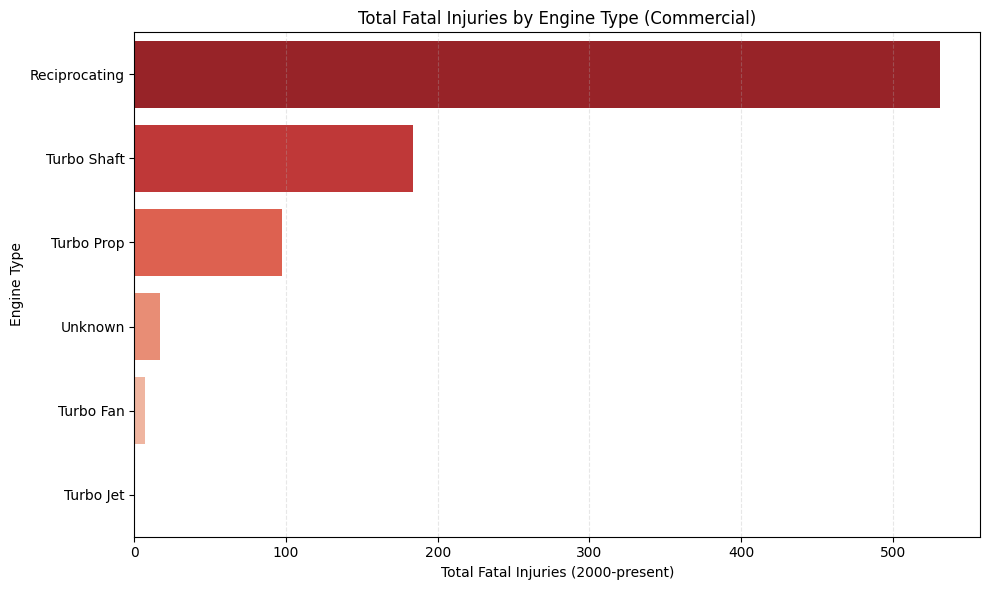

In [115]:
fatal_by_engine = (
    df_commercial_100.groupby("Engine.Type", as_index=False)["Total.Fatal.Injuries"]
    .sum()
    .sort_values("Total.Fatal.Injuries", ascending=False)
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=fatal_by_engine,
    x="Total.Fatal.Injuries",
    y="Engine.Type",
    palette="Reds_r",
    errorbar=None      
)

plt.title("Total Fatal Injuries by Engine Type (Commercial)")
plt.xlabel("Total Fatal Injuries (2000-present)")
plt.ylabel("Engine Type")
plt.grid(True, axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Similarly to private flights, reciprocating engines account for the overwhelming majority of fatal injuries (500+ cases), while all other engine types combined represent a tiny fraction of fatalities. We should avoid reciprocating engines and consider turbine-based alternatives (turbo fan, turbo prop, turbo shaft, or turbo jet), which show dramatically lower fatality rates.

## Multivariate 1: Mean fatal injuries by weather and phase of flight

Let’s turn the combo of *weather* and *phase of flight* into a heat‑map.  
We’ll build a mini‑DataFrame with just those columns, pivot it so rows = weather and columns = phase, take the **mean** of fatal injuries, then plot the table with `sns.heatmap()`. A darker cell = higher average fatalities.


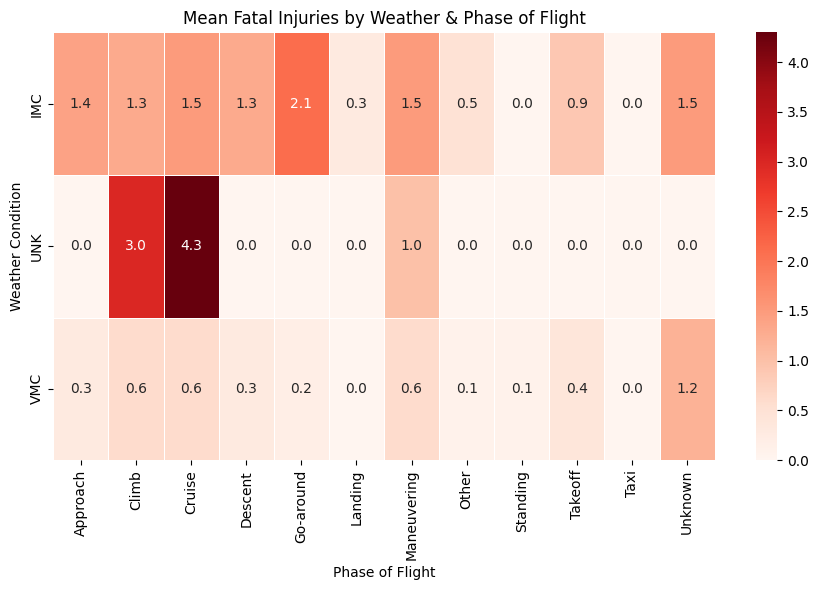

In [116]:
# TODO research how to make heatmaps (done)
cols = ["Weather.Condition", "Broad.phase.of.flight", "Total.Fatal.Injuries"]
df_wx_phase = df_100plus[cols].dropna() # We need to make a smaller dataframe with the variables we are looking for

# pivot to a table: rows = weather, cols = phase, values = mean fatalities
heat = (
    df_wx_phase
    .pivot_table(index="Weather.Condition",
                 columns="Broad.phase.of.flight",
                 values="Total.Fatal.Injuries",
                 aggfunc="mean",
                 fill_value=0) # To help fill out blank cells
    .round(1)                       # tidy one‑decimal display to avoid very long numbers
    .sort_index()
)

# plot
plt.figure(figsize=(9,6))
sns.heatmap(heat,
            annot=True, fmt=".1f",
            cmap="Reds", linewidths=.5)

plt.title("Mean Fatal Injuries by Weather & Phase of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

Unknown weather conditions (UNK) show the highest fatality rates, particularly during climb (3.0) and cruise (4.3) phases. IMC (Instrument Meteorological Conditions) also shows elevated risk during go-around (2.1). Most flight phases in VMC (Visual Meteorological Conditions) show relatively low fatality rates.

So to put it simply, we should prioritize flight planning and training to avoid flying in unknown or uncertain weather conditions. When IMC flight is necessary, exercise extra caution during go-around procedures and approach phases.

## Multivariate 2: Accident counts by weather condition and severity

Let’s stack up accident counts by *injury severity* (Fatal, Serious, Minor, None) for each **weather condition**.  
We’ll build a little cross‑tab and feed it straight into `plot(kind="bar", stacked=True)` so the height shows total accidents and the coloured slices show how bad the outcomes were in each kind of weather.

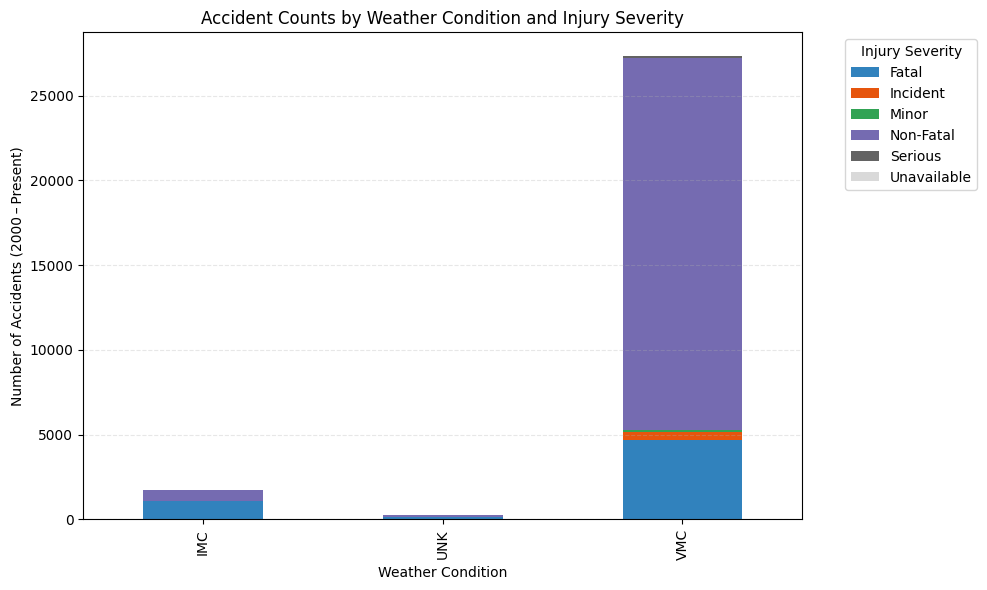

In [117]:
# Build the count table: rows = Weather, columns = Injury Severity
severity_counts = (
    df_100plus[["Weather.Condition", "Injury.Severity"]]
      .dropna()                 # keep rows with both fields present
      .value_counts()
      .unstack(fill_value=0)    # pivot so we get a matrix of counts
      .sort_index()
)

severity_counts.plot(kind="bar",
                     stacked=True,
                     figsize=(10,6),
                     colormap="tab20c")   # pastel stack colours

plt.title("Accident Counts by Weather Condition and Injury Severity")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents (2000 – Present)")
plt.legend(title="Injury Severity",
           bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


Most accidents happen in VMC (good weather), probably just because that’s when most flying happens. Most of them aren’t fatal — but there are still a lot of fatal ones just due to volume. IMC (bad weather) has way fewer accidents overall, but a higher chance they’re fatal.

# Business Recommendations

### 1. Best Private Aircraft Models to Purchase
Safest options: TaylorCraft, Vans, and Aero Commander consistently show the fewest accidents among manufacturers with 100+ incidents in our dataset.

Focus your private fleet purchases on these three manufacturers. TaylorCraft and Vans offer excellent safety records. Aero Commander rounds out the top three. Avoid higher-incident manufacturers like Cessna or Piper for your initial fleet.

### 2. Best Commercial Aircraft Models to Purchase
Safest options: Airbus, North American, and Boeing lead the commercial safety rankings with the lowest accident counts among established manufacturers.

Stick exclusively with these three for commercial operations. Airbus and Boeing are the obvious choices, but don't overlook North American aircraft which also show excellent safety records. The data shows going with lesser-known commercial manufacturers significantly increases your risk profile.

### 3. Engine Type Priority: Avoid Reciprocating Engines
Reciprocating engines dominate fatality statistics with 16,000+ deaths in private flights alone. Turbine engines show dramatically lower death rates across both sectors.

Never purchase aircraft with reciprocating engines. Specify turboprop as your minimum acceptable engine type, with turbofan/turbojet preferred. This single decision will eliminate your biggest risk factor.

### 4. Engine Configuration: Multi-Engine Only for Private Operations
Twin-engine aircraft show much lower fatality concentrations when accidents occur, while single-engine planes dominate the death statistics in private aviation.

Build your private fleet exclusively around tw0-engine aircraft. The safety margin justifies the extra purchase and operating costs. Single-engine private aircraft are simply too risky for a business focused on minimizing liability.

### 5. Start with Commercial Operations First
Commercial aviation shows dramatically lower accident rates across all our metrics compared to private aviation. Commercial accidents are also less likely to result in total aircraft destruction.

Launch your aviation division with commercial operations to minimize initial risk while building expertise. Add private operations later once you've established strong safety protocols. The data clearly shows commercial is the safer business to enter first.

### 6. Focus on Substantial Damage Prevention
Our analysis shows most crashes result in substantial damage rather than minor repairable damage, meaning accidents typically lead to significant financial losses regardless of fatalities.

Invest heavily in preventive maintenance, pilot training, and operational procedures. Since most accidents cause substantial damage, your focus should be preventing accidents entirely rather than minimizing damage after they occur. Budget for comprehensive insurance coverage as accidents rarely result in minor, cheap-to-fix damage.

In [118]:
df_100plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29396 entries, 47675 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      29396 non-null  object        
 1   Event.Date              29396 non-null  datetime64[ns]
 2   Injury.Severity         29396 non-null  object        
 3   Aircraft.damage         29396 non-null  object        
 4   Aircraft.Category       19824 non-null  object        
 5   Make                    29396 non-null  object        
 6   Model                   29396 non-null  object        
 7   Amateur.Built           29396 non-null  object        
 8   Number.of.Engines       29396 non-null  float64       
 9   Engine.Type             29396 non-null  object        
 10  FAR.Description         19644 non-null  object        
 11  Purpose.of.flight       29396 non-null  object        
 12  Total.Fatal.Injuries    29396 non-null  float64